# Gradient Descent Implementation for Finding Optimal Coefficients in MSE Regression

____

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### For example, we have 1000 objects and 10 features each (as X) and target (as Y)

In [54]:
df = pd.read_csv('data.csv')

df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.113768,0.930064,0.330528,0.010987,0.265703,0.699462,0.058465,0.431643,0.650958,0.751820,30.147094
1,0.380048,0.485946,0.870232,0.473401,0.454516,0.500864,0.471723,0.234329,0.072982,0.008372,21.424402
2,0.768462,0.217706,0.727438,0.718377,0.452155,0.434638,0.043989,0.972489,0.450133,0.378157,31.422056
3,0.606637,0.604335,0.540332,0.491236,0.325632,0.206348,0.825767,0.332475,0.955518,0.162811,31.308588
4,0.119770,0.469718,0.632829,0.504207,0.238259,0.452457,0.775360,0.174262,0.117621,0.218883,23.322751
...,...,...,...,...,...,...,...,...,...,...,...
995,0.538751,0.072868,0.337400,0.531014,0.240128,0.652470,0.772777,0.062364,0.860766,0.594596,32.910569
996,0.898252,0.169217,0.750159,0.155727,0.844080,0.403090,0.098818,0.360846,0.613283,0.323710,27.457300
997,0.813122,0.251505,0.284456,0.314093,0.869697,0.995674,0.971214,0.324628,0.584621,0.020221,32.980881
998,0.722563,0.533463,0.747446,0.973052,0.462915,0.959898,0.561589,0.059606,0.599894,0.407610,34.254264


In [55]:
# X will be our samples
X = df[["feature_1", "feature_2", "feature_3", \
          "feature_4", "feature_5", "feature_6", \
          "feature_7", "feature_8", "feature_9", \
          "feature_10"]] 

# Y will be our targets
Y = df["target"]

In [56]:
print(X.shape, Y.shape)

(1000, 10) (1000,)


___

### Next lets realize a class to optimize OLS linear regression coefficients.

In [57]:
class GradientDescentMse:

    # Base class for implementing gradient descent
    # in a linear regression task

    # Create initialization method, which gets samples,
    # targets, learning rate (step), threshold
    # and a copy as arguments
    # learning rate, threshold and copy with default values
    def __init__(self, samples: pd.DataFrame,
                 targets: pd.DataFrame,
                 learning_rate: float = 1e-3,
                 threshold=1e-6,
                 copy: bool = True):

        self.samples = samples
        self.targets = targets
        self.learning_rate = learning_rate
        self.threshold = threshold

        # If copy equal True, then create
        # copy of samples and targets
        if copy:
            self.samples = samples.copy()
        else:
            self.samples = samples

        self.iteration_loss_dict = {}

    # We can add B0 to betas with this method
    # Create column with constant feature
    # Add this column to the samples
    # Add 1 to betas
    def add_constant_feature(self):

        constant_feature = np.ones((self.samples.shape[0], 1))
        self.samples = np.hstack((self.samples, constant_feature))
        self.beta = np.ones(self.samples.shape[1])

    # Method to determine the MSE
    # Find all predictions
    # Figure out loss of our predictions
    # Find MSE and return it
    def calculate_mse_loss(self):

        predictions = np.dot(self.samples, self.beta)
        loss = (predictions - self.targets) ** 2
        mse = np.mean(loss)

        return (mse)

    # Implementing a math formula to determine
    # the gradient of a function in numpy
    def calculate_gradient(self) -> np.ndarray:

        value_in_tuple = np.dot(self.samples, self.beta).ravel() - self.targets.ravel()
        gradient = 2 * np.mean(value_in_tuple.reshape(-1, 1) * self.samples, axis=0)

        return gradient

    # Rewrite beta versions with new values
    def iteration(self):

        self.gradient = self.calculate_gradient()
        self.beta = self.beta - self.learning_rate * self.gradient

    # Iterative training of model weights until a threshold is triggered
    # Write MSE and iteration number in iteration_loss_dict
    def learn(self):

        self.previous_mse = self.calculate_mse_loss()
        self.iteration()
        self.new_mse = self.calculate_mse_loss()

        while abs(self.previous_mse - self.new_mse) > self.threshold:
            self.previous_mse = self.calculate_mse_loss()
            self.iteration()
            self.new_mse = self.calculate_mse_loss()
            self.iteration_loss_dict[len(self.iteration_loss_dict) + 1] = self.new_mse

        return "Learning process completed successfully"


### Let's train the coefficients of the linear model using the gradient descent we implemented

In [58]:
GD = GradientDescentMse(samples=X, targets=Y)
GD.add_constant_feature()
GD.learn()

'Learning process completed successfully'

In [59]:
print('The weight of model with x0, x1, ..., x10 equals: \n\n' + str(GD.beta))

The weight of model with x0, x1, ..., x10 equals: 

[0.88733305 1.90100713 2.88063607 3.87662612 4.89623507 5.89126182
 6.89254811 7.90311947 8.87580109 9.86109585 4.94854733]


____

## Learning path research with Matplotlib
### Let's create graphs showing how the value of the minimized functional changed during training with each next iteration

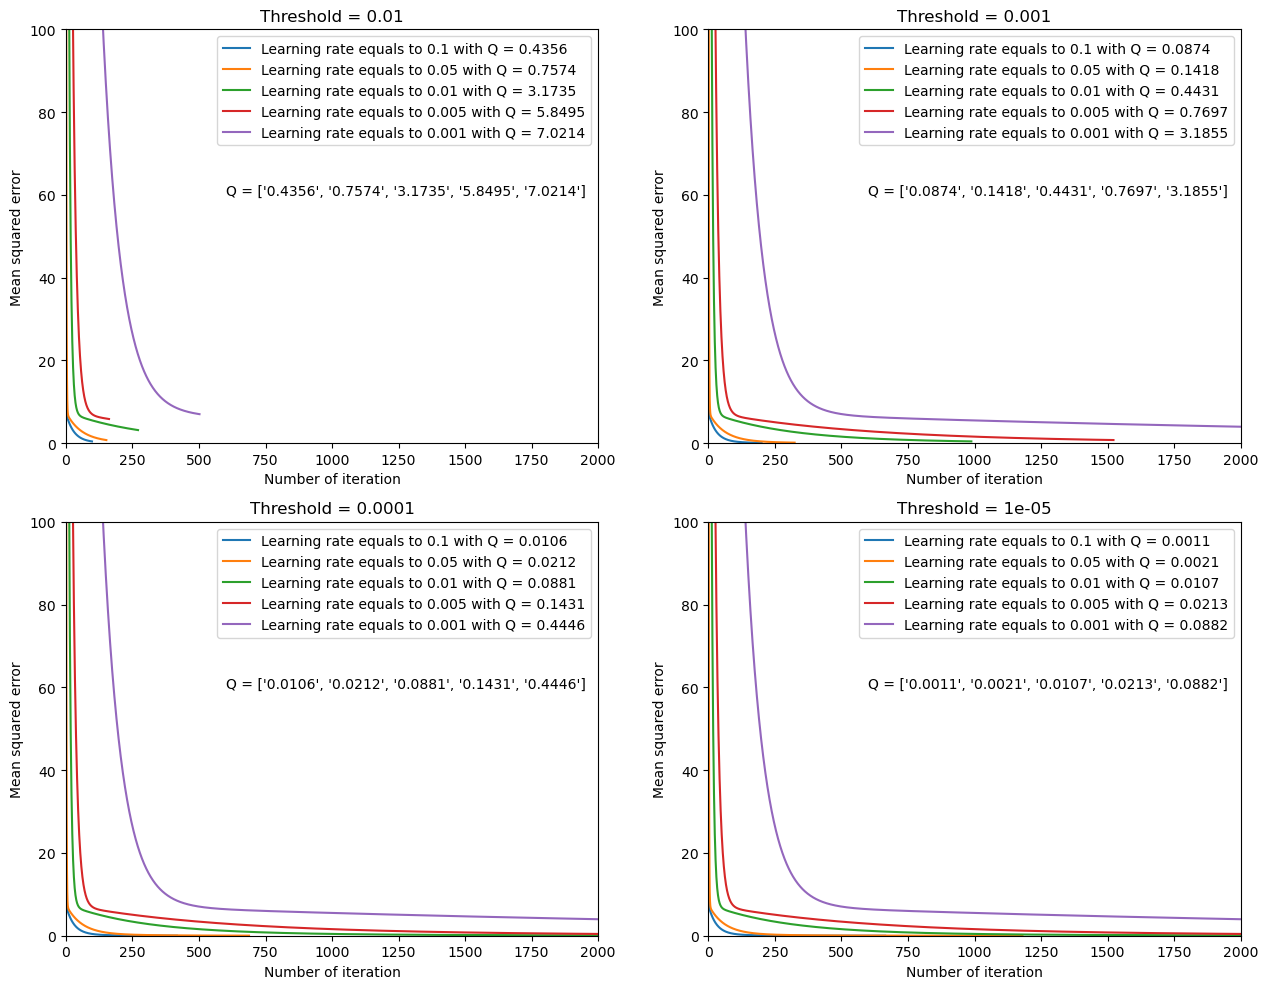

In [60]:
# Create figure
fig = plt.figure()

# Change a size of figure
fig.set_size_inches(13, 10)

# Create arrays with different thresholds and learning_rates
thresholds = [1e-2, 1e-3, 1e-4, 1e-5]
learning_rates = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]

# Create a loop over all thresholds
for i, threshold in enumerate(thresholds):
    # Create an array with MSE values
    Q_values = []

    # Create subplots to the figure
    ax_ = fig.add_subplot(2, 2, i + 1)

    # Create a loop over all learning_rates
    for rate in learning_rates:
        # Create a model of GradientDescentMse class
        model = GradientDescentMse(samples=X, targets=Y, learning_rate=rate, threshold=threshold)
        model.add_constant_feature()
        model.learn()

        # Create a learning_path variable as a dictionary from iteration_loss_dict
        learning_path = model.iteration_loss_dict

        # Plot graphs with number of iteration as X-axis and MSE as Y-axis
        plt.plot(learning_path.keys(), learning_path.values())
        plt.ylim(0, 100)
        plt.xlim(0, 2000)
        # Append MSE values to Q_values
        Q_values.append(str(round(list(learning_path.values())[-1], ndigits=4)))

    # Adding legends, titles, and labels to the graph
    plt.ylabel('Mean squared error')
    plt.xlabel('Number of iteration')
    plt.legend([f'Learning rate equals to {learning_rates[i]}' + ' with Q = ' + str(Q_values[i]) for i in
                range(len(learning_rates))])
    ax_.set_title(f'Threshold = {threshold}')
    ax_.annotate(f'Q = {Q_values}', xy=(0.3, 0.6), xycoords='axes fraction')

# Automatically adjust the positions of subplots
fig.tight_layout()

plt.show()
